In [1536]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
from scipy.special import gammaln

In [1537]:
def critical_max(x,y):
      cp_x,cp_y,cp_i=[],[],[]
      for i in range(len(x)):
        if i+1<len(x) and i-1>=0:
          d1=(y[i+1]-y[i])/(x[i+1]-x[i])
          d2=(y[i]-y[i-1])/(x[i]-x[i-1])
          if d1*d2<0 and y[i]>=y[i+1] and y[i]>=y[i-1]:
            cp_i.append(i)
            cp_x.append(x[i])
            cp_y.append(y[i])
      return cp_i,cp_x,cp_y

In [1538]:
array_x = []
array_y = []

with open('decay.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('    ')
        array_x.append(float(l[0]))
        #array_y.append(float(l[1]))
with open('decay2.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('    ')
        array_x.append(float(l[0]))
        #array_y.append(float(l[1]))
with open('decay3.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('    ')
        array_x.append(float(l[0]))
        #array_y.append(float(l[1]))
print(len(array_x))

11200


In [1539]:
arraywo0 = []
for i in range(len(array_x)):
    if array_x[i] >= 500:
        arraywo0.append(array_x[i]*1e-6)
print(arraywo0)
print(len(arraywo0))

[0.0018399999999999998, 0.0018599999999999999, 0.00376, 0.00349, 0.00087, 0.00229, 0.00066, 0.0009199999999999999, 0.00109, 0.0157, 0.0009699999999999999, 0.0014299999999999998, 0.00124, 0.0006399999999999999, 0.00086, 0.0014, 0.0007199999999999999, 0.00086, 0.00065, 0.0005099999999999999, 0.00058, 0.0012799999999999999, 0.0070999999999999995, 0.00447, 0.00117, 0.0012799999999999999, 0.00142, 0.0045899999999999995, 0.00241, 0.008409999999999999, 0.00435, 0.00198, 0.0022299999999999998, 0.00137, 0.00094, 0.0030299999999999997, 0.006229999999999999, 0.001, 0.00471, 0.00117, 0.00132, 0.0015899999999999998, 0.0005499999999999999, 0.0017499999999999998, 0.0006799999999999999, 0.00098, 0.00218, 0.0038699999999999997, 0.00164, 0.006549999999999999, 0.0018, 0.00293, 0.00201, 0.00196, 0.0011899999999999999, 0.010029999999999999, 0.00212, 0.00328, 0.00607, 0.00165, 0.00162, 0.005209999999999999, 0.00343, 0.0025199999999999997, 0.0011099999999999999, 0.00066, 0.005549999999999999, 0.0007999999999

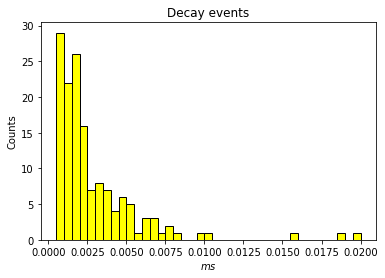

[29. 22. 26. 16.  7.  8.  7.  4.  6.  5.  1.  3.  3.  1.  2.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.]
[0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045 0.005
 0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095 0.01
 0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014  0.0145 0.015
 0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019  0.0195 0.02  ]
<BarContainer object of 39 artists>


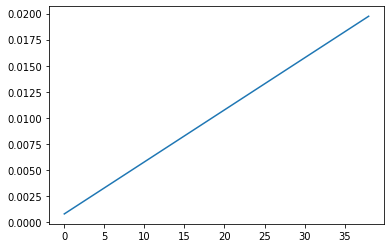

0.07691369471176195


In [1540]:
fig, ax1 = plt.subplots()
n, bins_edges, patches= ax1.hist(arraywo0,  bins=np.arange(0.0005, 0.02 + 0.0005, 0.0005),color='yellow', edgecolor ='k')
y_axis, x_axis = np.histogram(arraywo0, bins=np.arange(0.0005, 0.02 + 0.0005, 0.0005))
plt.xlabel('$m s$')
plt.ylabel('Counts')
plt.title('Decay events')
x_axis = x_axis[:-1]
error = np.sqrt(y_axis)
plt.show()
ax2 = ax1.twinx()
print(n)
print(bins_edges)
print(patches)
# calculate bin centers
bin_centers = 0.5 * (bins_edges[1:]+bins_edges[:-1])
plt.plot(bin_centers)
plt.show()


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

print(poisson.pmf(22,20))
def linear_func(x,a,b):
    return a*x+b
#print(len(n))
# fit with curve_fit
parameters, cov_matrix = curve_fit(linear_func, bins_edges[1:], n)
#print(parameters)
# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0,20000,20)

#ax2.plot(x_plot, linear_func(x_plot,parameters[0],parameters[1]),marker='o', linestyle='',label='Fit result',)
#ax2.legend()
#plt.show()


In [1541]:
prob_dict = {}
for i in range(0,len(n)):
    prob_dict[bin_centers[i]] = n[i]
    #print(prob_dict,"\n")

tot = 0
event_prob = []
for key in prob_dict:
    tot += prob_dict[key]
    event_prob.append(prob_dict[key])


prob_array =[]
for val in event_prob:
    prob_array.append(val/tot)

print(prob_array)

[0.19863013698630136, 0.1506849315068493, 0.1780821917808219, 0.1095890410958904, 0.04794520547945205, 0.0547945205479452, 0.04794520547945205, 0.0273972602739726, 0.0410958904109589, 0.03424657534246575, 0.00684931506849315, 0.02054794520547945, 0.02054794520547945, 0.00684931506849315, 0.0136986301369863, 0.00684931506849315, 0.0, 0.0, 0.00684931506849315, 0.00684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00684931506849315, 0.0, 0.00684931506849315]


In [1542]:
def exp(time, N, l ):
    return N * np.exp(-l*time)


def bin1nl(time, n, taus, width, Nopt):
    array = []
    sum = 0
    for cal in taus:
        for index in range(0,len(time)):
            sum += (n[index]*np.log(exp(time[index], Nopt, 1/val)*width)) - (exp(time[index], Nopt, 1/val)*width)
            array.append(sum)
    return array

In [1543]:
popt, pcov = curve_fit(exp, bin_centers, n, p0= [1, 1])
print(popt)

[ 43.10922121 472.94784164]


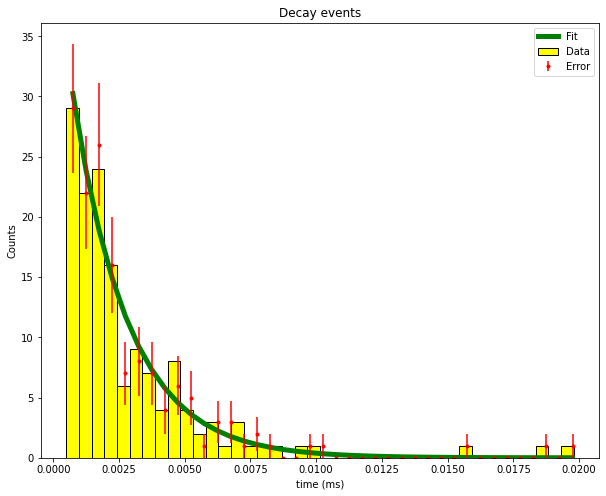

30.235781540431386


In [1544]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, exp(bin_centers, *popt), label="Fit",color='green', linewidth = 5,)
plt.errorbar(bin_centers, y_axis, yerr= error, fmt=".", label="Error",color='red')
n2, bins_edges, patches= plt.hist(arraywo0, bins = 40, color='yellow',label='Data',edgecolor ='k')
plt.xlabel('time (ms)')
plt.ylabel('Counts')
plt.title('Decay events')
plt.legend()
plt.show()
print(exp(bin_centers, *popt)[0])


In [1545]:
tau = 1/popt[1]
print(tau/1000)

2.1143980624442857e-06


In [1546]:
print(4*np.pi/(1242*3117)*0.01)

3.2460220520368985e-08


In [1547]:
def lnprob(t_i, count, tau, N0):
    mean = N0*np.exp(-t_i/tau)
    ln_p_i = count * np.log(mean) - gammaln(count) - mean
    return ln_p_i


/var/folders/6w/28rd4wvs0y59v5wzmxnd6f000000gn/T/ipykernel_45479/102967455.py:42: RuntimeWarning: invalid value encountered in log
  prod_arr[counterk,counterh] = np.log(prod)
/var/folders/6w/28rd4wvs0y59v5wzmxnd6f000000gn/T/ipykernel_45479/102967455.py:44: RuntimeWarning: invalid value encountered in log
  if np.log(prod) > maxval and np.log(prod) !='nan':


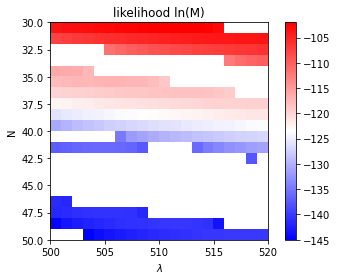

30
512


In [1548]:
def exp(time, N, l ):
    return N * np.exp(-time * l)
n, bins_edges = np.histogram(arraywo0, bins = 41)
# remove all the zeros
nn = []
for i in range(len(n)):
    if n[i]!= 0:
       nn.append(n[i])
       l
def poisson(x,mu):
    return np.exp(-mu) * mu **(x) / factorial(x)

'''
likehood_g = poisson(bin_centers[0],poisson_guess[0])
likehood_a = poisson(bin_centers[0],nn[0])
print(likehood_g-likehood_a) # following by a loop, we get series and then we factor them
'''
prod_arr = np.zeros((20,20))
counterk = 0
counterh = 0
maxval = -100000
indexN = 0
indexlambda = 0

for k in range(30,50):
    counterh = 0
    for h in range(500,520):
        N_guess = k #44
        tau_guess = h #506
        poisson_guess = exp(bin_centers,N_guess, tau_guess)

        likehood_arr = np.zeros(len(nn))
        for i in range(len(nn)):
            likehood_g = poisson(bin_centers[i],poisson_guess[i])
            likehood_a = poisson(bin_centers[i],nn[i])
            likehood_arr[i] = likehood_g-likehood_a
        prod = 1
        for num in likehood_arr:
            prod *= num
        #print(likehood_arr)
        #print(prod)
        prod_arr[counterk,counterh] = np.log(prod)
        #print(np.log(prod))
        if np.log(prod) > maxval and np.log(prod) !='nan':
            maxval = np.log(prod)
            indexN = k

            indexlambda = h
        counterh += 1
    counterk += 1

plt.imshow(prod_arr,cmap = 'bwr',extent =(500,520,50,30))
plt.title("likelihood ln(M)")
plt.ylabel("N")
plt.xlabel("$\lambda$")
plt.colorbar()
plt.show()

print(indexN)
print(indexlambda)

In [1549]:
tau = 1/indexlambda
print(tau/1000)
#error
error2 = tau/1000 / np.sqrt(len(n))
print(error2 * 1e+6)


1.953125e-06
0.3050268786886837


$$\frac{4 \pi H}{\sqrt{H^2+4 R^2}}$$

In [1556]:
#flux: solid angle * surface area * flux rate
#rectangle 
flux_rect = 2*np.pi * 721 * 0.01 /(4*np.pi)
#flux_cylin = 
#volume pi * r^2 * h
#surface area = 2 * pi * r * h
r = 2 * 3117/1242 # cm
h = 3117 /2 /np.pi / r
flux_cylin = 4* np.pi *h / np.sqrt(h**2 + 4* r**2) * 1242 * 0.01 /(4*np.pi)

print(flux_rect)
print(flux_cylin)

flux_rect = 1/60
print(flux_rect)
print(r)
print(h)


3.6049999999999995
12.356426801846833
0.016666666666666666
5.019323671497585
98.835219660067


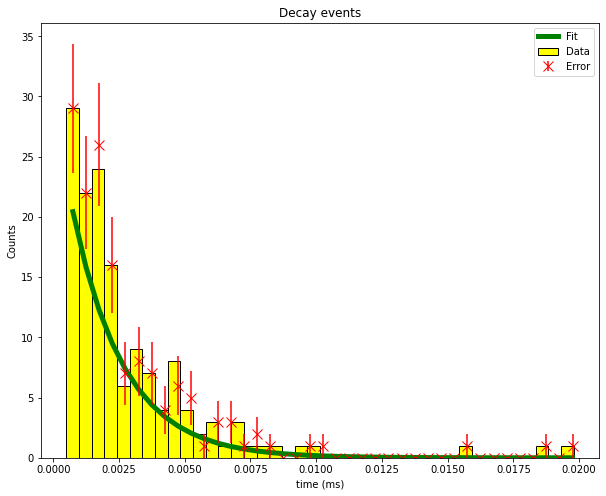

'\nfor i in range(len(bin_centers)):\n    print(exp(bin_centers, *[indexN,indexlambda])[i])\n'

In [1551]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, exp(bin_centers, *[indexN,indexlambda]),label="Fit",color='green', linewidth = 5)
plt.errorbar(bin_centers, y_axis, yerr= error, fmt="x",markersize = 10, label="Error",color='red')
n2, bins_edges, patches= plt.hist(arraywo0, bins = 40, color='yellow',label='Data',edgecolor ='k')
plt.xlabel('time (ms)')
plt.ylabel('Counts')
plt.title('Decay events')
plt.legend()
plt.show()
'''
for i in range(len(bin_centers)):
    print(exp(bin_centers, *[indexN,indexlambda])[i])
'''

/var/folders/6w/28rd4wvs0y59v5wzmxnd6f000000gn/T/ipykernel_45479/1396331235.py:41: RuntimeWarning: invalid value encountered in log
  prod_arr[counterk,counterh] = np.log(prod)
/var/folders/6w/28rd4wvs0y59v5wzmxnd6f000000gn/T/ipykernel_45479/1396331235.py:43: RuntimeWarning: invalid value encountered in log
  if np.log(prod) > maxval and np.log(prod) !='nan':


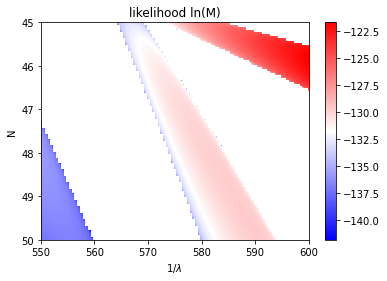

45.80808080808081
600.0


In [1552]:
def exp(time, N, l ):
    return N * np.exp(-time * l)
n, bins_edges = np.histogram(arraywo0, bins = 40)
# remove all the zeros
nn = []
for i in range(len(n)):
    if n[i]!= 0:
       nn.append(n[i])
def poisson(x,mu):
    return np.exp(-mu) * mu **(x) / factorial(x)
'''
likehood_g = poisson(bin_centers[0],poisson_guess[0])
likehood_a = poisson(bin_centers[0],nn[0])
print(likehood_g-likehood_a) # following by a loop, we get series and then we factor them
'''
prod_arr = np.zeros((100,100))
counterk = 0
counterh = 0
maxval = -100000
indexN = 0
indexlambda = 0

testrangek = np.linspace(45,50,100)
testrangeh = np.linspace(550,600,100)
for k in testrangek:
    counterh = 0
    for h in testrangeh:
        N_guess = k #44
        tau_guess = h #506
        poisson_guess = exp(bin_centers,N_guess, tau_guess)

        likehood_arr = np.zeros(len(nn))
        for i in range(len(nn)):
            likehood_g = poisson(bin_centers[i],poisson_guess[i])
            likehood_a = poisson(bin_centers[i],nn[i])
            likehood_arr[i] = likehood_g-likehood_a
        prod = 1
        for num in likehood_arr:
            prod *= num
        #print(likehood_arr)
        prod_arr[counterk,counterh] = np.log(prod)
        #print(np.log(prod))
        if np.log(prod) > maxval and np.log(prod) !='nan':
            maxval = np.log(prod)
            indexN = k
            indexlambda = h
        counterh += 1
    counterk += 1

plt.imshow(prod_arr,cmap = 'bwr',extent=(550, 600 , 50, 45), aspect='auto')
plt.title("likelihood ln(M)")
plt.ylabel("N")
plt.xlabel("$1/\lambda$")
plt.colorbar()
plt.show()

print(indexN)
print(indexlambda)

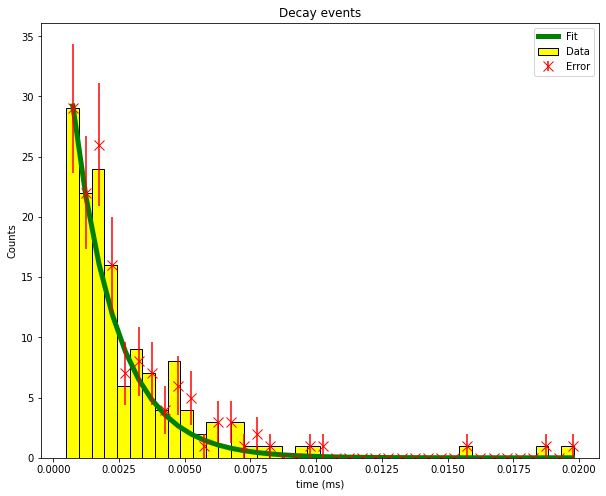

In [1553]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, exp(bin_centers, *[indexN,indexlambda]),label="Fit",color='green', linewidth = 5)
plt.errorbar(bin_centers, y_axis, yerr= error, fmt="x",markersize = 10, label="Error",color='red')
n2, bins_edges, patches= plt.hist(arraywo0, bins = 40, color='yellow',label='Data',edgecolor ='k')
plt.xlabel('time (ms)')
plt.ylabel('Counts')
plt.title('Decay events')
plt.legend()
plt.show()

In [1554]:
tau = 1/indexlambda
print(tau/1000)
#error
error2 = tau/1000 / np.sqrt(len(n))
print(error2 * 1e+6)

1.6666666666666669e-06
0.26352313834736496
